In [1]:
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt
import random

In [2]:
# Choose the signal frequency (0.2Hz) and the number of cycles to sample over (2) and the number of samples (50)

f_s = 0.2
N_cycles = 2.0
N_samples = 1000

# Calculate the timespan
period = 1/f_s
T =  N_cycles*period

# Set the number of terms in the Fourier series (initially, equal to the number of samples, which is bad!)

N_terms = int(N_samples/25)

random.seed(1)

In [3]:
# Calculate the spacing (in time) between data points
dt = T/N_samples

# Set up arrays to hold the time (x-axis), amplitude (y-axis), and frequencies (Fourier transform)
t = np.zeros(N_samples)
y = np.zeros(N_samples)
f = np.zeros(N_terms)

yhigh = np.zeros(1000)
ylow = np.zeros(1000)
time = np.zeros(1000)

ytReal = np.zeros(N_terms)
ytImag = np.zeros(N_terms)

yfftReal = np.zeros(N_terms)
yfftImag = np.zeros(N_terms)

power = np.zeros(N_terms)
powerfft = np.zeros(N_terms)

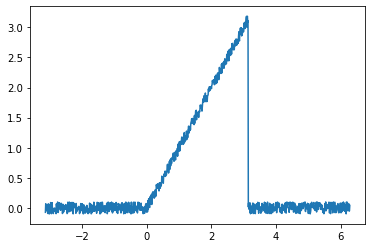

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random

N_samples = 1000
t_low = -np.pi
t_high = 2.0*np.pi

t = np.linspace(t_low,t_high,N_samples)
y = np.zeros(N_samples)

for i in range(N_samples):
    if t[i] < 0.0:
        y[i] = 0.0 + 0.1*random.uniform(-1,1)
    if t[i] >= 0.0 and t[i] < np.pi:
        y[i] = t[i] + 0.1*random.uniform(-1,1)
    if t[i] >= np.pi:
        y[i] = 0.0 + 0.1*random.uniform(-1,1)
    
for i in range(N_terms):
    f[i] = i/(N_terms*dt)
    
plt.plot(t,y)
# print(y,f,t)

In [5]:
from timeit import default_timer as timer

start = timer()

# Define a useful constant, because I am sick of typing it so many times!

twopiT=2.0*np.pi/T

# rather than just making things exactly zero, make them a small number, so that logarithmic plots do not fail.
epsilon = 0.000001

for n in range(N_terms):
    ytReal[n]=epsilon
    ytImag[n]=epsilon
    for i in range(N_samples):
        ytReal[n] = ytReal[n] + 2.0/T*y[i]*np.cos(twopiT*n*i*dt)*dt
        ytImag[n] = ytImag[n] + 2.0/T*y[i]*np.sin(twopiT*n*i*dt)*dt  
    power[n]=(ytReal[n]**2+ytImag[n]**2)
    
end = timer()
btime = end-start
print ("Brash: ",btime)
ymaxr = max(ytReal)
ymaxi = max(ytImag)
ymax = 1.2*max(ymaxr,ymaxi)

Brash:  0.12697589999999992


In [6]:
integral = 0.0
N_real = int(N_terms)

for n in range(N_real):
    integral = integral + power[n]
print("Average Power = %.2f Watts." % (integral/2.0))

#Nyquist frequency is 1/2 the sampling rate frequency
f_nyquist = 0.5*(1.0/dt)
print("Nyquist frequency = %.2f Hz." % f_nyquist)

for i in range(1000):
    time[i] = i*T/1000.0
    ylow[i] = np.sin(2.0*np.pi*time[i]*f_s)
    yhigh[i] = -np.sin(2.0*np.pi*time[i]*(2.0*f_nyquist-f_s))

Average Power = 1.36 Watts.
Nyquist frequency = 50.00 Hz.


In [7]:
start = timer()
N_fft = len(y)
yfft = fft(y)
yfftReal = 2.0/N_fft*yfft.real
yfftImag = 2.0/N_fft*yfft.imag
powerfft = 4.0/N_fft**2*abs(yfft)**2
end = timer()
print ("Python: ",(end-start))
print("Ratio = ",btime/(end-start))

for i in range(N_terms):
    print (ytReal[i],yfftReal[i],ytImag[i],yfftImag[i],power[i],powerfft[i])

Python:  0.0005425999999999487
Ratio =  234.01382233691842
1.0486645721367653 1.0486635721367652 1e-06 -0.0 1.0996973848557852 1.0996952875266406
-0.864585381457186 -0.8645863814571851 -0.32454833671806393 0.3245493367180633 0.8528395046959296 0.8528418829653639
0.4402161617174964 0.4402151617174967 0.4474703970864946 -0.4474693970864944 0.3940200253060301 0.39401824993491247
-0.010854059274104943 -0.01085505927410521 -0.3355706862889421 0.3355716862889418 0.11272549609915737 0.11272618895064829
-0.21260921511349506 -0.21261021511349504 0.08076571807409205 -0.08076471807409198 0.051725779567200134 0.05172604325619419
0.17845181195238444 0.1784508119523841 0.12735044313710364 -0.1273494431371041 0.048063184556305844 0.048062572953795665
-0.009701997452690046 -0.009702997452690296 -0.16396778685836383 0.1639687868583639 0.026979563881801834 0.026979911223370484
-0.12186040180764034 -0.12186140180764034 0.06054516284366198 -0.06054416284366192 0.0185156742724851 0.018515796904963022
0.108

(-3.0, 3.0)

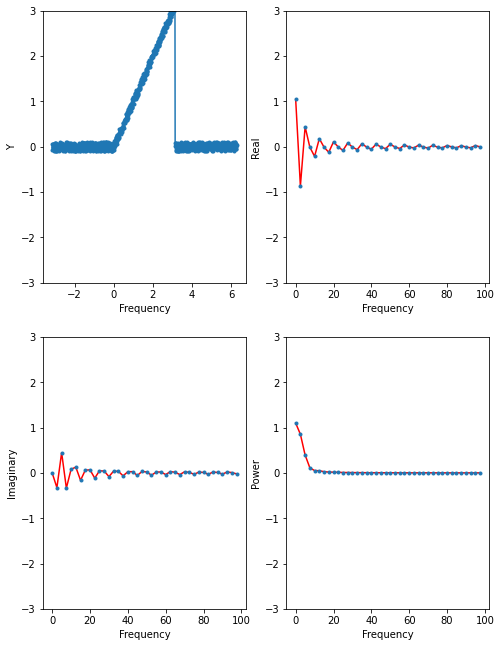

In [8]:
fig2, axs2 = plt.subplots(nrows=2, ncols=2, figsize=(8,11))

axs2[0,0].plot(t,y,'.-')
axs2[0,0].set_ylabel('Y')
axs2[0,0].set_xlabel('Frequency')
axs2[0,0].set_ylim(-3.0,3.0)

axs2[0,1].plot(f,yfftReal[0:N_terms],'r-')
axs2[0,1].plot(f,ytReal,'.')
axs2[0,1].set_ylabel('Real')
axs2[0,1].set_xlabel('Frequency')
axs2[0,1].set_ylim(-3.0,3.0)

axs2[1,0].plot(f,-yfftImag[0:N_terms],'r-')
axs2[1,0].plot(f,ytImag,'.')
axs2[1,0].set_ylabel('Imaginary')
axs2[1,0].set_xlabel('Frequency')
axs2[1,0].set_ylim(-3.0,3.0)

axs2[1,1].plot(f,powerfft[0:N_terms],'r-')
axs2[1,1].plot(f,power,'.')
axs2[1,1].set_ylabel('Power')
axs2[1,1].set_xlabel('Frequency')
axs2[1,1].set_ylim(-3.0,3.0)

(-1.2, 1.2)

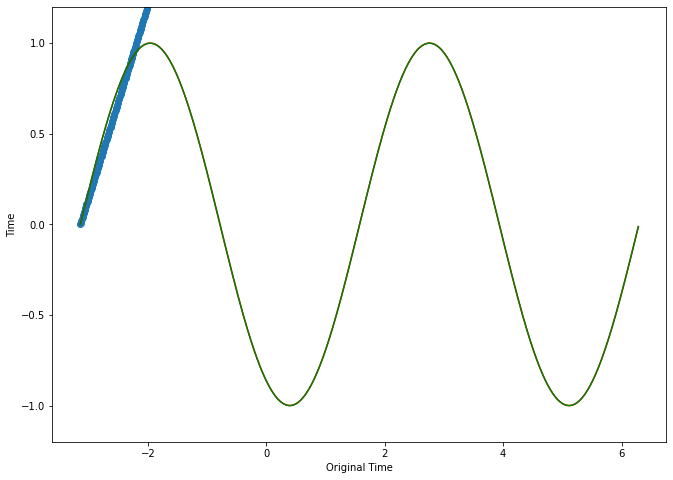

In [9]:
fig3, axs3 = plt.subplots(nrows=1, ncols=1, figsize=(11,8))

axs3.plot(t,time,'o')
axs3.plot(t,yhigh,'r-')
axs3.plot(t,ylow,'g-')
axs3.set_ylabel('Time')
axs3.set_xlabel('Original Time')
axs3.set_ylim(-1.2,1.2)